# Statistical Foundations of Machine Learning: Project Regression
### Yelda Büyük || 0527366 || Master Student Computer Science || Vrije Universiteit Brussel || 2019-2020



# Introduction

The second project for this course requires a **regression** project. We will start off by explaining what regression is, which datasets we will use and then generate predictions for the sales of video games. Afterwards, we will take a look at the error metrics. The goal of this notebook is to predict sales of video games based on their attributes and compare the error metrics.

# What is regression?

Before we start, we would like to know what regression is in Machine Learning. Regression is a **supervised machine learning** technique. We use input variables x and an output variable y to map the input to the output by using a function. In other words, we teach the program how to do the mapping between the input and the output variable. Other techniques which make use of supervised learning are decision trees, classification, support vector machines, ... . We have a regression problem when the output variable is a real or continuous value such as salary, weight, price, sale numbers, thus the output variable is **numerical**. 

# The datasets
We will be working with two datasets for this project: a real-life dataset from Kaggle (https://www.kaggle.com/gregorut/videogamesales) and a synthetic dataset. 

## The real-life dataset
The first step is to import the real-life dataset from the CSV. We then show the head of the dataset to get a feel of the dataset. We clean the dataset by dropping rows which have a NaN field. These cannot be used. 


In [1]:
import pandas as pd
data_real = pd.read_csv('vgsales.csv')
data_real.dropna() # removing NaN rows
data_real.head()

Name Platform  Year     Genre   Publisher  NA_Sales  EU_Sales  \
0     Kaboom!     2600  1980      Misc  Activision      1.07      0.07   
1      Boxing     2600  1980  Fighting  Activision      0.72      0.04   
2  Ice Hockey     2600  1980    Sports  Activision      0.46      0.03   
3     Freeway     2600  1980    Action  Activision      0.32      0.02   
4      Bridge     2600  1980      Misc  Activision      0.25      0.02   

   JP_Sales  Other_Sales  Global_Sales  
0       0.0         0.01          1.15  
1       0.0         0.01          0.77  
2       0.0         0.01          0.49  
3       0.0         0.00          0.34  
4       0.0         0.00          0.27

We have now replaced all the rows with a NaN value. This is part of the **preprocessing phase**. The preprocessing phase is when you prepare and clean your dataset. 

### Data description
* **Name:** name of the video game.
* **Platform:** the gaming platform the video game runs on.
* **Year:** the year the vidoe game was released.
* **Genre:** the genre of the video game.
* **Publisher:** the publisher of the video game.
* **NA_Sales:** the number of sales in millions in North America.
* **EU_Sales:** the number of sales in millions in Europe.
* **JP_Sales:** the number of sales in millions in Japan.
* **Other_Sales:** the number of sales in millions in other countries.
* **Global_Sales:** the number of sales in millions in total.

## The synthetic dataset
We use sklearn to generate the synthetic dataset for the regression task. We choose to make it almost as big as the real life dataset to get better results for the comparison during the evaluation phase.

In [2]:
from sklearn.datasets import make_regression
from matplotlib import pyplot
# generate regression dataset
X_syn, y_syn = make_regression(n_samples=16000, n_features=8, n_informative= 3, noise=0.1)

# Exploring the data
Before we start predicting sales, we are interested in the real-life data. We are going to plot some data.  First of all, we would like to know the total amount of games, publishers, platforms and genres the dataset contains. Then, we would like to know the top 100 most sold video games across the globe. Then we will take a look at the most sold genres and the most popular platforms. These are all factors that could influence the sale numbers. We will also take a look at these factors per region. It is a possibility that cultural differences could affect differences in used platforms, genres, etc.

We start off by checking the total number of games, publishers, platforms used and genres.

In [3]:
print("Total games:", len(data_real))
print("Total publisher:", len(data_real['Publisher'].unique()))
print("Total platforms:", len(data_real['Platform'].unique()))
print("Total genres:", len(data_real['Genre'].unique()))

Total games: 16296
Total publisher: 576
Total platforms: 31
Total genres: 12


We are interested in knowing in what year the most video games have sold. We do this by grouping the sales by year and adding them together to a total sum. 

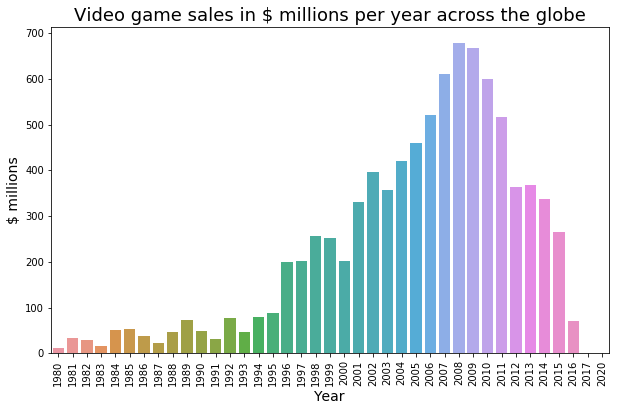

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns 

year = data_real.groupby(['Year']).sum()
per_year = year['Global_Sales']
x = per_year.index

plt.figure(figsize=(10,6))
ax = sns.barplot(y = per_year, x = x)
ax.set_xlabel(xlabel="Year", fontsize=14)
ax.set_xticklabels(labels=x,rotation=90)
ax.set_ylabel(ylabel="$ millions", fontsize=14)
ax.set_title(label="Video game sales in $ millions per year across the globe", fontsize=18)
plt.show()

The bar graph tells us that the peek of video games across the globe took place in 2008, approxamitely a total revenue of 670,000,000 $ of games were sold that year. The graph also tell us that there were no to little information in the years 2017 and 2020.

Next up we want to know which publishers are known to publish popular games. We do this by grouping the global sales per publisher and sorting them. Afterwards we grab the top 20 to know who the best selling publishers are in the video gaming industry according to this dataset. We define a helper function to plot the bar graphs for the top 20.

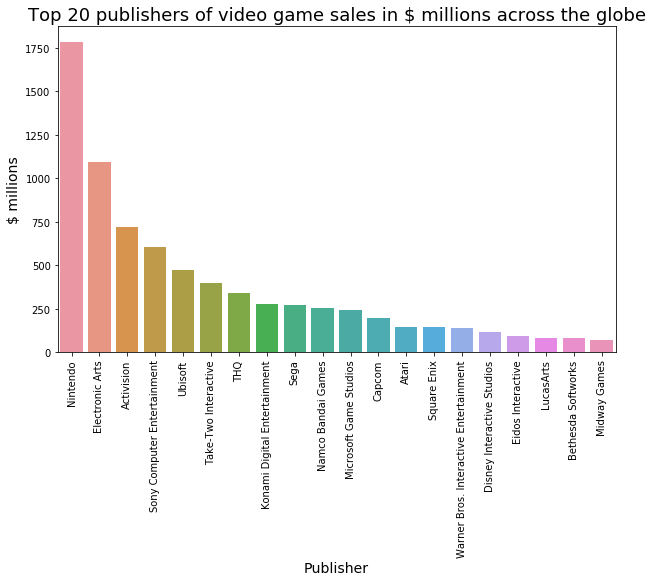

In [5]:
def plot_bar_graph_top20(category, xlabel, ylabel, title):
    data = data_real.groupby([category]).sum().sort_values(by=['Global_Sales'], ascending=False)
    data = data.head(20)
    per_data = data['Global_Sales']
    x = per_data.index.astype(str)
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y=per_data, x=x)
    ax.set_xlabel(xlabel=xlabel, fontsize=14)
    ax.set_ylabel(ylabel=ylabel, fontsize=14)
    ax.set_xticklabels(labels=x, rotation=90)
    ax.set_title(title, fontsize=18)
    plt.show()

plot_bar_graph_top20('Publisher', 'Publisher', '$ millions', 'Top 20 publishers of video game sales in $ millions across the globe')


We can gain more insight to the dataset by for example looking at which genre or which platform sells the best. We will be visiualizing the answer to these two questions.

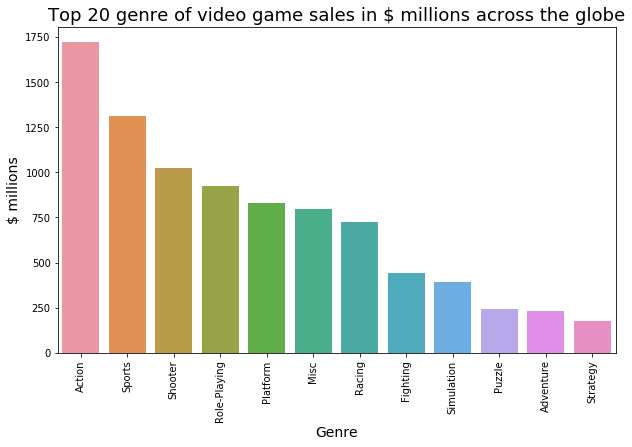

In [6]:
plot_bar_graph_top20('Genre', 'Genre', '$ millions', 'Top 20 genre of video game sales in $ millions across the globe')

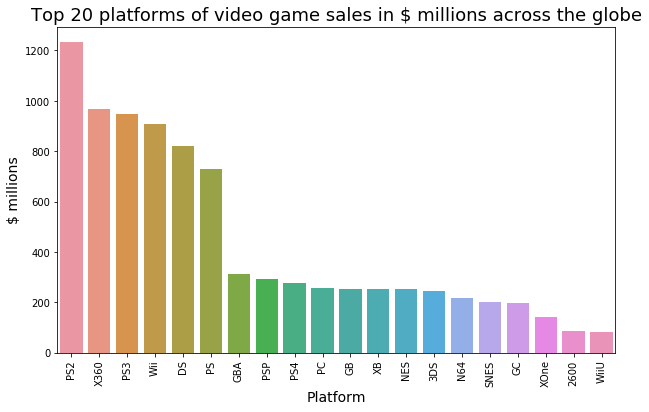

In [7]:
plot_bar_graph_top20('Platform', 'Platform', '$ millions', 'Top 20 platforms of video game sales in $ millions across the globe')

We notice that Nintendo has the highest revenue in sales. Does this mean that they are also the most used platform? When we look at the last graph we notice that PS2 is the most popular platform. However, we know that Nintendo has different platforms such as the WII, DS, WIIU, etc. The publishers can have severeal platforms, meaning that Nintendo has high sales because it offers a variety of platforms. A lot more information can be fetched from this dataset, but for the sake of simplicity we will not go further into analyzing more data.

# The algorithms

This section uses two machine learning techniques to perform regression on the two datasets. We chose to work with support vector regression and decision tree regression. We did not choose for a lineair regression or a multi lineair regression because we could not find a lineair relationship between the variables. 

## Preprocessing the data
Some techniques are not able to handle categorical data. Therefore, we will encode these data with the label encoder by making use of the LabelEncoder which sklearn offers. We will be encoding every categorical column into a numerical one. We also want to drop the column which holds the names of the games because it does not affect the process.

In [8]:
from sklearn.preprocessing import LabelEncoder

# preprocessing the data
# converting the categorial values to numerical values with a label encoder
labelEncoder = LabelEncoder()
data_real['Publisher'] = data_real['Publisher'].astype(str)
data_real['Publisher'] = labelEncoder.fit_transform(data_real['Publisher'])
data_real['Genre'] = labelEncoder.fit_transform(data_real['Genre'])
data_real['Platform'] = labelEncoder.fit_transform(data_real['Platform'])

#drop name column
data_real = data_real.drop(['Name'], axis=1)

## Splitting the data
Before we can fit both models, we have to split the dataset into a training and a testing dataset. We are interested in the comparison of the error metrics of both models when used in-sample and when used out-of-sample. Therefore we will split the dataset for both cases and both datasets.

### Out-of-sample
Out-of-sample is the case where the training dataset and the testing dataset are seperate. The testing dataset is never used to train the current model. This means that the model will never have seen the testing dataset beforehand, which reflects real life events more accurately.

In [9]:
from sklearn.model_selection import train_test_split

# Split trainig and testing set -- REAL life dataset
X = data_real.loc[:, data_real.columns != "Global_Sales"]
y = data_real.iloc[:,-1] # target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Split trainig and testing set -- SYNTHETIC dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(X_syn, y_syn, test_size=0.3)

### In-sample
When we use in-sample, we mean that we train the model with the entire dataset and use already seen data to test the model. This form of evaluation performs better than an out-of-sample evaluation because the data has already been trained.

In [10]:
size_data = len(X)
size_data_syn = len(X_syn)

# Split training and testing set -- REAL life dataset
X_train_in = X[0:size_data]
y_train_in = y[0:size_data]
X_test_in = X[size_data-4888:size_data] # selecting the last ~30% of the dataset
y_test_in = y[size_data-4888:size_data]

# Split training and testing set -- SYNTHETIC dataset
X_train_in_syn = X_syn[0:size_data_syn]
y_train_in_syn = y_syn[0:size_data_syn]
X_test_in_syn = X_syn[size_data_syn-4800:size_data_syn]
y_test_in_syn = y_syn[size_data_syn-4800:size_data_syn]

# Support Vector Regression

Support Vector Regression is a type of a support vector machine that supports lineair and non-lineair regression in machine learning. We use the SVR (support vector regression) while working with continuous values which happens to be the case with regression. The goal with a SVR is to fit the error within a certain threshold, whilst in a simple regression you would be trying to minimize the error. 

We have already imported the datasets in the previous sections and we have also preprocessed the data. The next step is to define the x and the y variables. Afterwards we will be splitting the data into a training set and a testing set by using cross validation (out-of-sample) and without using cross validation (in-sample). For the project we choose to make the testing set 30% of the entire dataset. If you want to change this, simple adjust the decimal of test_size in the code below.

## Out-of-sample 
Here we use cross-validation. This means that the subset used for the testing will not be used to fit the model. We do this for both datasets.

At this point we have label encoded the genre, platform and publisher column in the real-life dataset. We have also split the testing and the training dataset for both datasets. The next step is to define a support vector regression and fit it with the training dataset for each dataset.

In [11]:
from sklearn.svm import SVR

## Real-life dataset
SVRM = SVR()
SVRM.fit(X_train, y_train)

## Synthetic dataset
SVRM_syn = SVR()
SVRM_syn.fit(X_train_syn, y_train_syn)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

After having fit the model, we have to generate predictions for both datasets. Keep in mind that we are generating predictions for data that has not been seen before by the model.

In [12]:
## Real-life dataset
SVR_prediction = SVRM.predict(X_test)

## Synthetic dataset
SVR_syn_prediction = SVRM_syn.predict(X_test_syn)

## In-sample
As mentioned before, we are interested in comparing the behaviour of both models when used within a out-of-sample and an in-sample evaluation. Therefore, we must also create SVR's and their predictions for the in-sample data for both datasets.

In [13]:
## Real-life dataset
SVRM_in = SVR()
SVRM_in.fit(X_train_in, y_train_in)

SVR_prediction_in = SVRM.predict(X_test_in)

## Synthetic dataset
SVRM_in_syn = SVR()
SVRM_in_syn = (X_train_in_syn, y_train_in_syn)

SVR_syn_prediction_in = SVRM_syn.predict(X_test_in_syn)

# Decision Tree Regression

Decision Tree Regression breaks a dataset down into smaller subsets while an associated decision tree is developed. The final tree is a tree with decision and leaf nodes. A decision node has two or more branches and they each represent a value while leaf nodes representa  decision on the nuemrical target. The core algorithm that is used for building decision trees is called ID3. ID3 is an algorithm that was invented by Ross Quinlan and it is widely used to generate a decision tree from a dataset. 

We define a decision tree regressor and fit the model for both datasets and both cases. 

## Out-of-sample

In [14]:
from sklearn.tree import DecisionTreeRegressor

# Real-life dataset
DTR = DecisionTreeRegressor(random_state=0)
DTR.fit(X_train, y_train)

# Synthetic dataset
DTR_syn = DecisionTreeRegressor(random_state=0)
DTR_syn.fit(X_train_syn, y_train_syn)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

The next step is to generate predictions for the test dataset of both datasets. The predictions formed are the predictions made for the games as to at which revenue value they would sell in global sales. Remember that these predictions are most likely to score worse than the ones generated from an in-sample evaluation as the data has not been seen yet before.

In [15]:
# Real-life dataset
DTR_prediction = DTR.predict(X_test)

#Synthetic dataset
DTR_syn_prediction = DTR_syn.predict(X_test_syn)

## In-sample

In [16]:
## Real life dataset
DTR_in = DecisionTreeRegressor(random_state=0)
DTR_in.fit(X_train_in, y_train_in)

## Synthetic dataset
DTR_in_syn = DecisionTreeRegressor(random_state=0)
DTR_in_syn.fit(X_train_in_syn, y_train_in_syn)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

Again, the next step is to create the predictions for both datasets.

In [17]:
## Real-life dataset
DTR_prediction_in = DTR_in.predict(X_test_in)

## Synthetic dataset
DTR_prediction_in_syn = DTR_in_syn.predict(X_test_in_syn)

# Model Evaluation

This section describes the model evaluation for both Support Vector Regression and the Decision Tree Regression. We start by defining and calculating the error metrics for regression. 

Model evaluation tries to calculate error metrics in order to check if the model is any good as they are just predictions and we cannot be certain if the predictions are accurate until the actual sales have taken place. We will be taking a look at mean squared error.

The mean squared error metric is one of the most preferred error metric used for regression tasks. It is the average of the squared difference between the target value and the value predicted by the regression model. It is preferred to other metrics because it is more optimized due to the fact that it squares the differences and thus penalizes even small errors.

We will calculate the mean squared error for the SVR and the DTR for both datasets and both in-sample and out-of-sample evaluation.

## Support Vector Regression
### Out-of-sample evaluation

In [18]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

## Real-life dataset
mse_SVR = mean_squared_error(y_test, SVR_prediction)
print("Out-of-sample mean squared error of the Support Vector Regression for the real-life dataset is: ", mse_SVR)

## Synthetic dataset
mse_SVR_syn = mean_squared_error(y_test_syn, SVR_syn_prediction)
print("Out-of-sample mean squared error of the Support Vector Regression for the synthetic dataset is: ", mse_SVR_syn)

Out-of-sample mean squared error of the Support Vector Regression for the real-life dataset is:  2.1271104836985084
Out-of-sample mean squared error of the Support Vector Regression for the synthetic dataset is:  2932.846292421875


### In-sample evaluation


In [19]:
## Real-life dataset
mse_SVR_in = mean_squared_error(y_test_in, SVR_prediction_in)
print("In-sample mean squared error of the SVR for the real life dataset is: ", mse_SVR_in)

## Synthetic dataset
mse_SVR_in_syn = mean_squared_error(y_test_in_syn, SVR_syn_prediction_in)
print("In-sample mean squared error of the SVR for the synthetic dataset is: ", mse_SVR_in_syn)

In-sample mean squared error of the SVR for the real life dataset is:  1.658882298085774
In-sample mean squared error of the SVR for the synthetic dataset is:  2823.17754493615


## Decision Tree Regression
### Out-of-sample evaluation

In [20]:
## Real life dataset
mse_DTR = mean_squared_error(y_test, DTR_prediction)
print("Out-of-sample mean squared error of the Decision Tree Regression for the real-life dataset is: ", mse_DTR)

## Synthetic dataset
mse_DTR_syn = mean_squared_error(y_test_syn, DTR_syn_prediction)
print("Out-of-sample mean squared error of the Decision Tree Regresion for the synthetic dataset is:", mse_DTR_syn)

Out-of-sample mean squared error of the Decision Tree Regression for the real-life dataset is:  0.07680553680598168
Out-of-sample mean squared error of the Decision Tree Regresion for the synthetic dataset is: 606.9403506477693


### In-sample evaluation

In [21]:
## Real-life dataset
mse_DTR_in = mean_squared_error(y_test_in, DTR_prediction_in)
print("In-sample mean squared error of the Decision Tree Regression for the real-life dataset is: ", mse_DTR_in)

## Synthetic dataset
mse_DTR_in_syn = mean_squared_error(y_test_in_syn, DTR_prediction_in_syn)
print("In-sample mean squared error of the Decision Tree Regression for the synthetic dataset is: ", mse_DTR_in_syn)

In-sample mean squared error of the Decision Tree Regression for the real-life dataset is:  1.2274959083469724e-07
In-sample mean squared error of the Decision Tree Regression for the synthetic dataset is:  2.7798403376934595e-12


# Conclusion
We started off by describing the used datasets. We chose to use a dataset from Kaggle and generated a synthetic dataset. We then took a look at the real life dataset. We tried to learn what we could from the data. Afterwards, we defined the Support Vector Regression model and the Decision Tree Regression model for both datasets.

Circling back towards our initial goal, we want to compare the mean squared error metric for both in-sample and out-of-sample use of the datasets. We computed this error for both datasets. As a result, we notice that the Decision Tree Regression has a significant smaller error rate than the Support Vector Regression. Many would say that we might be using a wrong kernel because we work with non-lineair data, but we make use of the RBF kernel. 

We also notice that the error rate for the synthetic dataset is significantly larger than the one for the real-life dataset. As mentioned before, the goal of regression in this case is to predict global sales numbers for video games before they enter the market. This can be very tricky as we are trying to predict the future. Many factors can influence the real sales and thus these predictions might not be as accurate as we hope them to be. Another factor is that the data in the synthetic dataset is not a good representation of the context. By this we mean that the categorial data that influence sales have been label encoded for the real life dataset. The synthetic dataset randomly generates numbers, while the synthetic dataset has a more spread out variation than the real life dataset encoded values. This means that the synthetic dataset has less learning value than the real life dataset. 
